## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [5]:
import tensorflow as tf
from os import path, getcwd, chdir
print(tf.__version__)

ACCURACY_THRESHOLD = 0.99

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"
print(ACCURACY_THRESHOLD)

1.14.0
0.99


7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20 

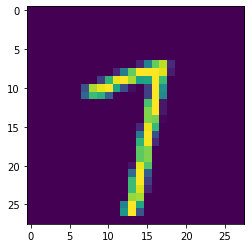

In [6]:
import numpy as np

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

In [7]:
# GRADED FUNCTION: train_mnist
def train_mnist():
  
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    mnist = tf.keras.datasets.mnist
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train=x_train/255.0
    x_test=x_test/255.0
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    #model fitting
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    

    # model fitting
    return history.epoch, history.history['acc'][-1]

In [8]:
train_mnist()

Epoch 1/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2008 - acc: 0.9401
Epoch 2/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0818 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0521 - acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0377 - acc: 0.9881
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0279 - acc: 0.9909
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0279 - acc: 0.9909
Epoch 1/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0206 - acc: 0.9934
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0206 - acc: 0.9934


([0], 0.99345)

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);